In [108]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [109]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [110]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore the data

In [111]:
train_images.shape

(60000, 28, 28)

In [112]:
#there are 60,000 labels in the training set:
len(train_labels)

60000

In [113]:
#Each label is an integer between 0 and 9:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [114]:
#There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:
len(test_labels)

10000

Preprocess the data

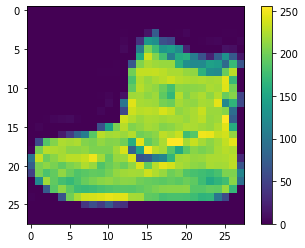

In [115]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [116]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

train_images = train_images / 255.0

test_images = test_images / 255.0

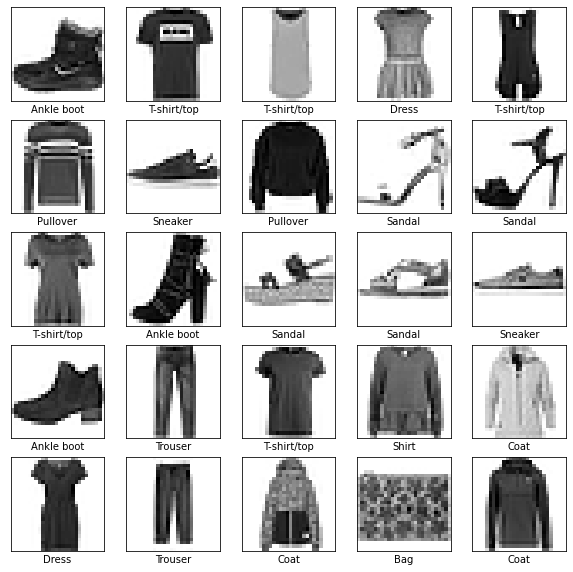

In [117]:
#let's display the first 25 images from the training set and display the class name below each image.


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build the model

In [118]:
#Set up the layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    
    tf.keras.layers.Dense(10)
])


#The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.




Compile the model

In [119]:
from tensorflow.keras.optimizers import Adam, SGD,RMSprop

op= tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name='RMSprop',

)

In [120]:
from tensorflow.keras.optimizers import Adam, SGD,RMSprop

model.compile(optimizer=op,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [121]:
#callbacks
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

Train the model

In [122]:
model.fit(train_images, train_labels, epochs=15,callbacks=[early_stopping])

Epoch 1/15
1875/1875 [==============================] - ETA: 0s - loss: 0.5278 - accuracy: 0.8130

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5278 - accuracy: 0.8130
Epoch 2/15
1855/1875 [============================>.] - ETA: 0s - loss: 0.3854 - accuracy: 0.8599

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3850 - accuracy: 0.8600
Epoch 3/15
1860/1875 [============================>.] - ETA: 0s - loss: 0.3515 - accuracy: 0.8721

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3512 - accuracy: 0.8722
Epoch 4/15
1851/1875 [============================>.] - ETA: 0s - loss: 0.3307 - accuracy: 0.8786

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3305 - accuracy: 0.8787
Epoch 5/15
1872/1875 [============================>.] - ETA: 0s - loss: 0.3159 - accuracy: 0.8842

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3157 - accuracy: 0.8843
Epoch 6/15
1853/1875 [============================>.] - ETA: 0s - loss: 0.3048 - accuracy: 0.8880

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3047 - accuracy: 0.8881
Epoch 7/15
1873/1875 [============================>.] - ETA: 0s - loss: 0.2954 - accuracy: 0.8927

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2953 - accuracy: 0.8928
Epoch 8/15
1869/1875 [============================>.] - ETA: 0s - loss: 0.2871 - accuracy: 0.8958

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2873 - accuracy: 0.8957
Epoch 9/15
1859/1875 [============================>.] - ETA: 0s - loss: 0.2834 - accuracy: 0.8964

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.8964
Epoch 10/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2761 - accuracy: 0.8998

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2761 - accuracy: 0.8998
Epoch 11/15
1871/1875 [============================>.] - ETA: 0s - loss: 0.2713 - accuracy: 0.9007

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2712 - accuracy: 0.9007
Epoch 12/15
1866/1875 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.9030

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2676 - accuracy: 0.9030
Epoch 13/15
1863/1875 [============================>.] - ETA: 0s - loss: 0.2630 - accuracy: 0.9044

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2629 - accuracy: 0.9043
Epoch 14/15
1851/1875 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.9064

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2587 - accuracy: 0.9063
Epoch 15/15
1848/1875 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9057

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9058


Evaluate accuracy

In [123]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3879 - accuracy: 0.8763 - 349ms/epoch - 1ms/step

Test accuracy: 0.8762999773025513


In [124]:
#It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

Make predictions


In [125]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [126]:
predictions = probability_model.predict(test_images)

In [127]:
#the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

predictions[0]

array([2.1109483e-07, 2.6551874e-14, 1.4362669e-11, 7.7730027e-09,
       1.2740320e-09, 4.3362705e-04, 1.2568479e-08, 4.7066021e-03,
       1.7712659e-09, 9.9485958e-01], dtype=float32)

In [128]:
#A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

np.argmax(predictions[0])

9

In [129]:
#So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

test_labels[0]

9

In [130]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions

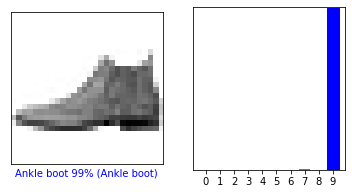

In [131]:
#Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

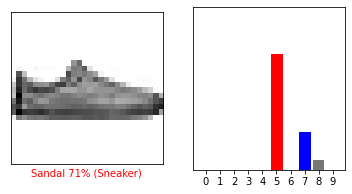

In [132]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

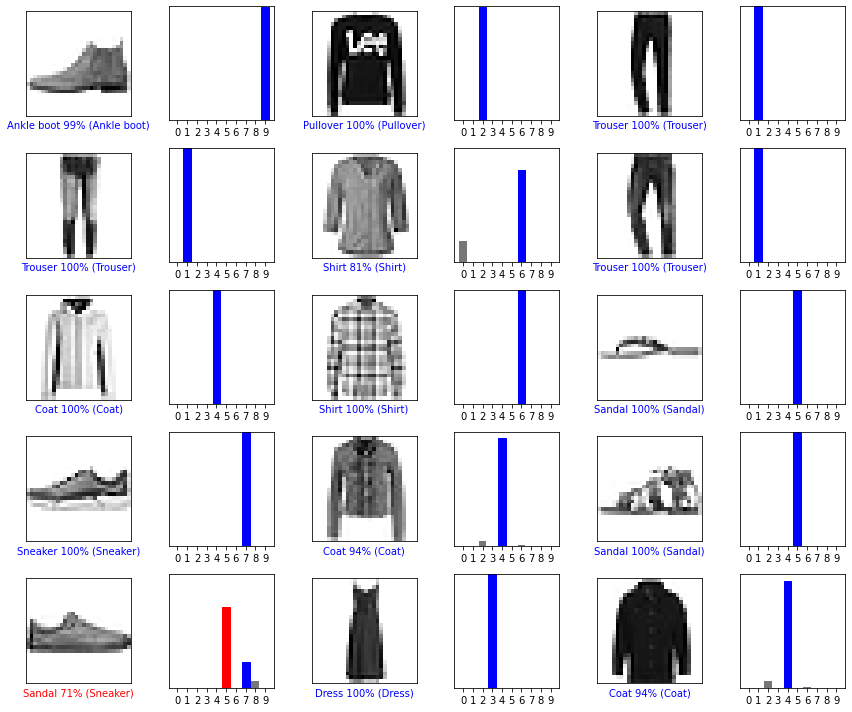

In [133]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model

In [134]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [135]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [136]:
#Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.0136451e-04 4.5851233e-11 9.9648833e-01 2.6081450e-06 2.2682229e-03
  8.4718778e-08 1.1392382e-03 1.2857899e-10 1.7004209e-07 6.1548011e-13]]


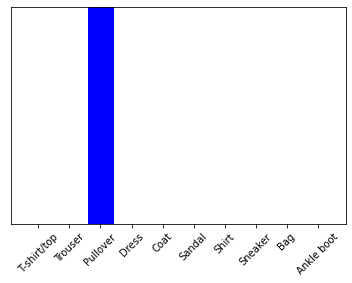

In [137]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [138]:
np.argmax(predictions_single[0])

2

Hypothesis:

> Different optimizers, loss functions, dropout, regularizations, activation functions and observe the change in performance as you tune these hyper parameters.

Optimizers : ['sgd', ‘adam’, ‘rmsprop’, 'nesterov', 'adagrad', 'adadelta']

1. Binary Classification Loss Functions
2. Binary Cross-Entropy
3. Hinge Loss
4. Squared Hinge Loss

Observations:

> 1. Adding more layers : 32,62,128; epochs = 10; optimizer = adam ; acc= 0.875599980354309
2. changing the number of epochs and optimizer : layers : 32,64,128 , activation - "relu"; optimizer = sgd ; epochs = 20 ; acc = 0.8834999799728394, loss = 0.3335
3. add learning rate with SGD optimizer = 0.001, epochs = 15, layers = 32,64,128,256; acc= 0.8202999830245972, loss = 0.5002
4.Add learning rate = 0.01, 4 layers = 32,64,128,256, callback = EarlyStopping(patience=20, min_delta=0.0001) ; acc = 0.8654000163078308, loss = 0.3730
4. layers 3 = 64,128 ; activation layers =relu, sigmoid ; epochs = 10; optimizer = RMSprop, leanring rate = 0.001, acc = 0.8435999751091003,loss = 0.5870





